<a href="https://colab.research.google.com/github/bibekuchiha/EDA/blob/master/Data%20Visualization/Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traveling to Acadia

In this project, we will use flower bloom data, and flight information to recommend the best time of year for someone to make a trip to Maine.


* in_bloom is a NumPy array containing 900 numbers. Each number is a day of the year, which represents the average start date of a flower blooming.

* flights is a NumPy array with 11,000 numbers. Each number is a day of the year, which represents a flight from your hometown to airports near Acadia, Maine.

Our goal is to create two histograms, each displaying the frequency of an occurrence each day of the year (either flights or flower blooms).

We will use the in_bloom variable to find a count of the number of flowers that start blooming each day of the year.

We will use the flights variable to find a count of the number of flights that occur each day of the year.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# load in data
in_bloom = np.loadtxt(open("in-bloom.csv"), delimiter=",")
flights = np.loadtxt(open("flights.csv"), delimiter=",")

Text(0, 0.5, 'Flight Count')

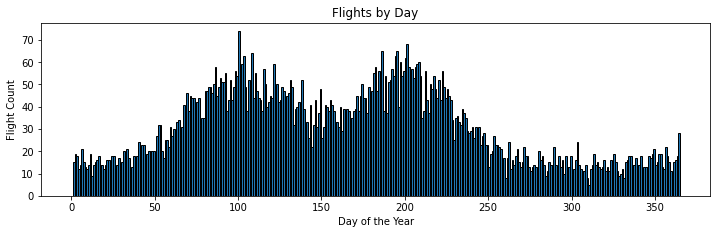

In [8]:
# Plot the histograms
f = plt.figure(figsize=(12,7))
plt.figure(1)
plt.subplot(211)
plt.hist(flights, range=(0, 365), bins = 365, edgecolor='black')
plt.title("Flights by Day")
plt.xlabel("Day of the Year")
plt.ylabel("Flight Count")

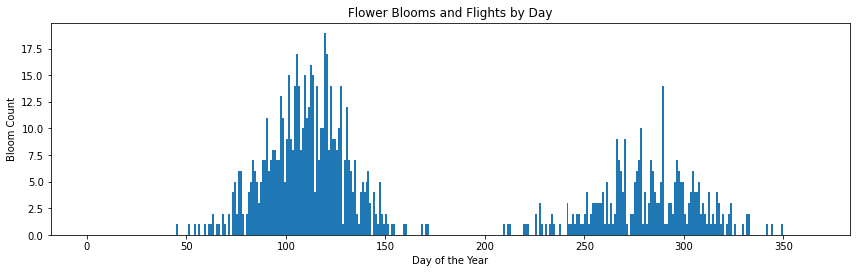

In [7]:
f = plt.figure(figsize=(12,7))
plt.subplot(212)
plt.hist(in_bloom, range=(0, 365), bins = 365)
plt.title("Flower Blooms and Flights by Day")
plt.ylabel("Bloom Count")
plt.xlabel("Day of the Year")
plt.tight_layout()

Based on these histograms, I would propose they go between days 250 and 300, which is the Fall. The flight’s histogram shows fewer flights between these days, while the flowers histogram indicates there should be a number of flowers in bloom during this time